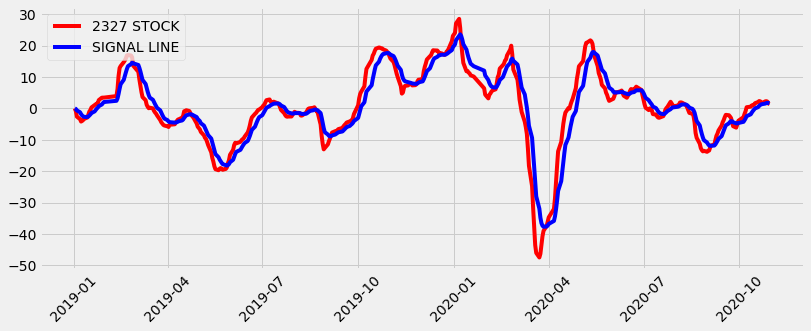

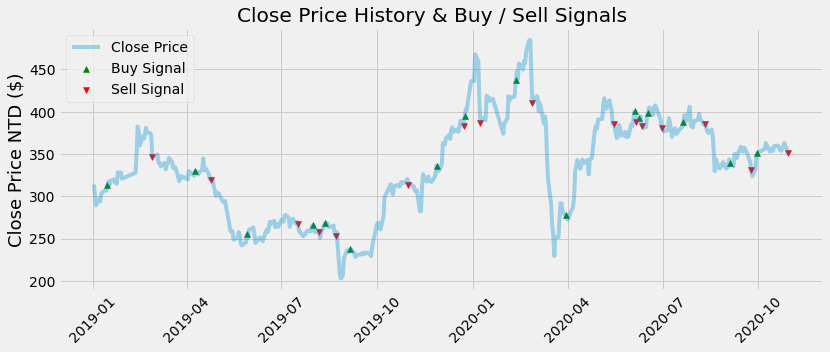

Total Cost： 5390.0 NTD
Total Earn： 5543.5 NTD
Net Value： 153.5 NTD
Rate Of Return： 2.85 %


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('2327 國巨.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    flag = 0

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     
NetValue = TotalEarn - TotalCost
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='2327 STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")